In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
train_df = pd.read_csv("C:/car_price/dataset/train.csv")

# Preview the first few rows to understand the dataset structure
print(train_df.head())


           model  year motor_type        running wheel    color   type  \
0         toyota  2022     petrol       3000  km  left  skyblue  sedan   
1  mercedes-benz  2014     petrol     132000  km  left    black  sedan   
2            kia  2018     petrol   95000  miles  left    other  sedan   
3  mercedes-benz  2002     petrol  137000  miles  left   golden  sedan   
4  mercedes-benz  2017     petrol     130000  km  left    black  sedan   

      status  motor_volume  price  
0  excellent           2.0  24500  
1  excellent           2.0  25500  
2  excellent           2.0  11700  
3  excellent           3.2  12000  
4       good           2.0  26000  


In [4]:
# Check if there are missing values in the dataset
missing_values = train_df.isnull().sum()
print("Missing Values in Train Dataset:")
print(missing_values)


Missing Values in Train Dataset:
model           0
year            0
motor_type      0
running         0
wheel           0
color           0
type            0
status          0
motor_volume    0
price           0
dtype: int64


In [5]:
# Check the data types of the columns
print("Data Types in Train Dataset:")
print(train_df.dtypes)


Data Types in Train Dataset:
model            object
year              int64
motor_type       object
running          object
wheel            object
color            object
type             object
status           object
motor_volume    float64
price             int64
dtype: object


In [6]:
# Summary statistics for numerical columns
numerical_columns = ['year', 'motor_volume', 'price']
print("Descriptive Statistics for Numerical Columns:")
print(train_df[numerical_columns].describe())


Descriptive Statistics for Numerical Columns:
              year  motor_volume         price
count  1642.000000   1642.000000   1642.000000
mean   2014.805725      2.035018  15982.633374
std       6.587573      0.253069   7176.084647
min    1987.000000      0.200000    462.000000
25%    2013.000000      2.000000  12000.000000
50%    2017.000000      2.000000  15750.000000
75%    2019.000000      2.000000  18500.000000
max    2023.000000      4.000000  87000.000000


In [7]:
def distance_to_km(distance_str):
    cleaned_str = distance_str.lower().replace(",", "").strip()
    if "miles" in cleaned_str:
        return float(cleaned_str.replace("miles", "").strip()) * 1.60934  # Convert miles to km
    elif "km" in cleaned_str:
        return float(cleaned_str.replace("km", "").strip())
    else:
        return np.nan  # In case the distance is not in a recognized format

# Apply the function to the 'running' column
train_df["running"] = train_df["running"].apply(distance_to_km)

# Check the processed 'running' column
print("Processed 'running' Column:")
print(train_df[['running']].head())


Processed 'running' Column:
     running
0    3000.00
1  132000.00
2  152887.30
3  220479.58
4  130000.00


In [8]:
categorical_columns = ['model', 'motor_type', 'wheel', 'color', 'type', 'status']
for col in categorical_columns:
    print(f"{col} unique values:")
    print(train_df[col].unique())


model unique values:
['toyota' 'mercedes-benz' 'kia' 'nissan' 'hyundai']
motor_type unique values:
['petrol' 'gas' 'petrol and gas' 'diesel' 'hybrid']
wheel unique values:
['left']
color unique values:
['skyblue' 'black' 'other' 'golden' 'blue' 'gray' 'silver' 'white' 'clove'
 'orange' 'red' 'green' 'cherry' 'brown' 'beige' 'purple' 'pink']
type unique values:
['sedan' 'suv' 'Universal' 'Coupe' 'pickup' 'hatchback'
 'minivan / minibus']
status unique values:
['excellent' 'good' 'crashed' 'normal' 'new']


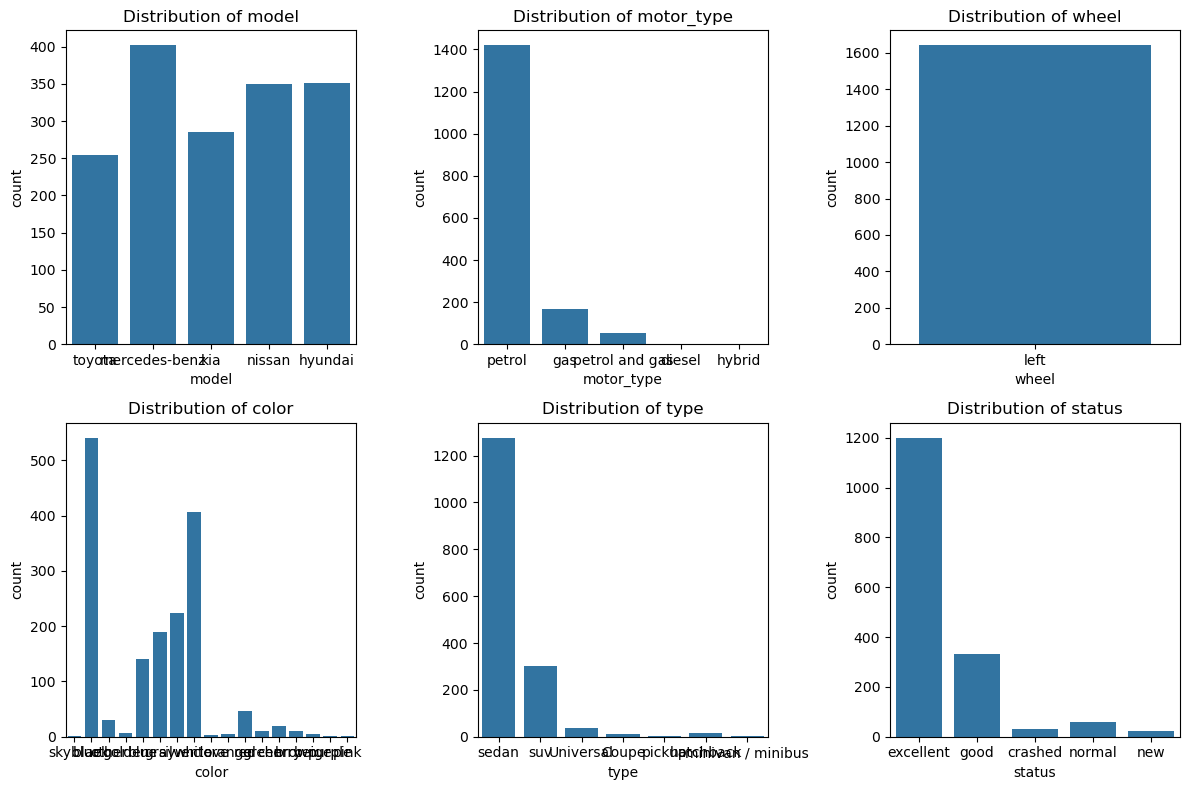

In [9]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(categorical_columns):
    plt.subplot(2, 3, i + 1)
    sns.countplot(x=col, data=train_df)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


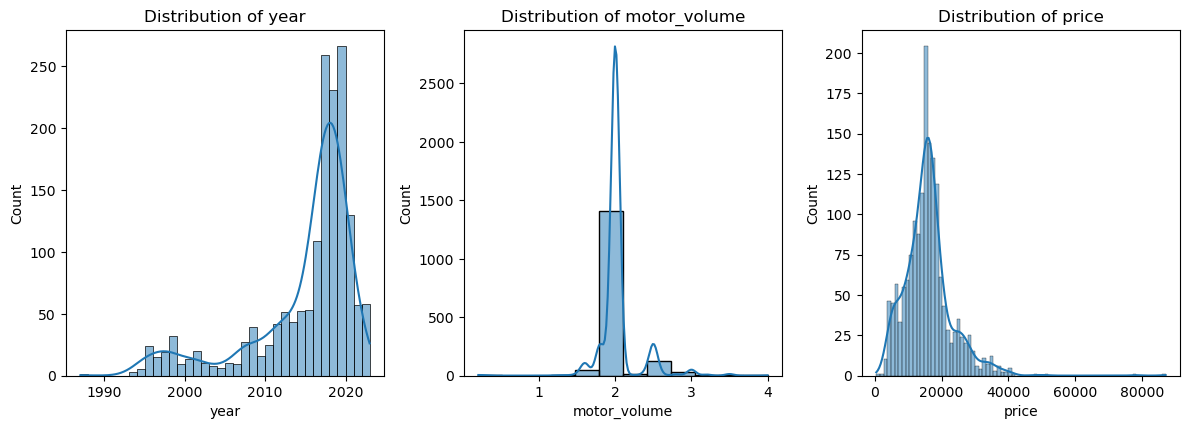

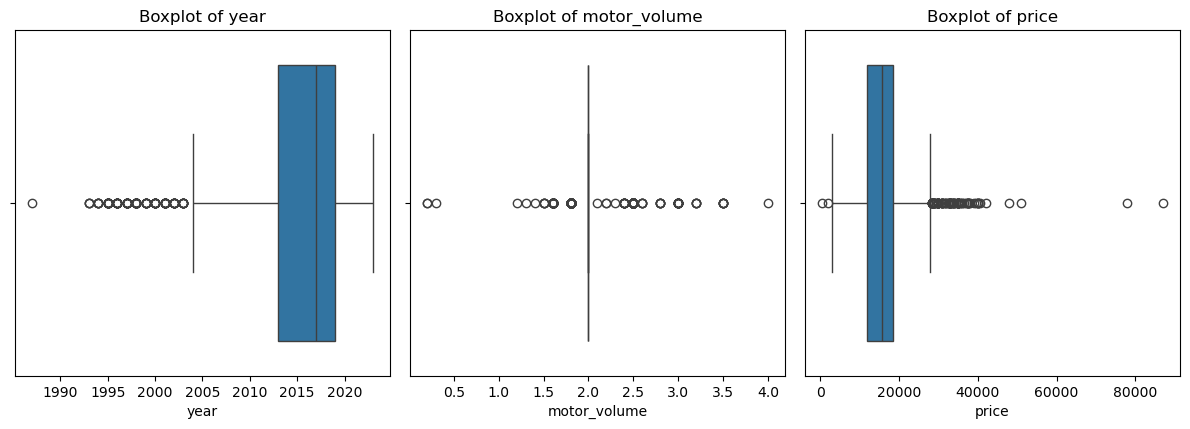

In [84]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_columns):
    plt.subplot(2, 3, i + 1)
    sns.histplot(train_df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Boxplots to check for outliers
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_columns):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x=train_df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


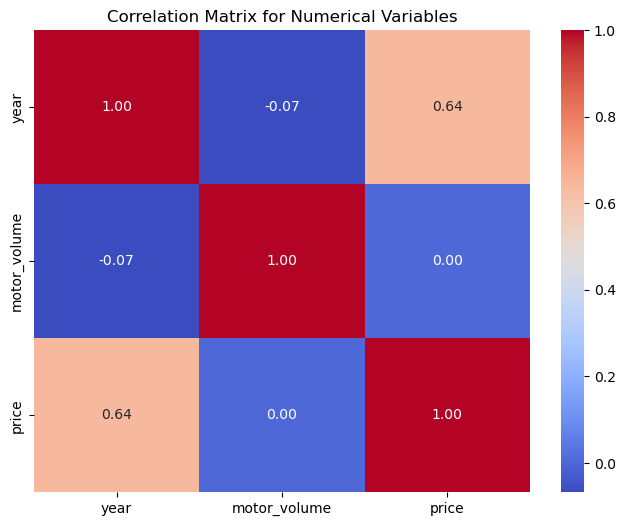

In [10]:
correlation_matrix = train_df[numerical_columns].corr()

# Visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for Numerical Variables')
plt.show()


In [11]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    le.fit(train_df[col])
    train_df[col] = le.transform(train_df[col])
    label_encoders[col] = le

print("Encoded Train Dataset (First 5 Rows):")
print(train_df.head())


Encoded Train Dataset (First 5 Rows):
   model  year  motor_type    running  wheel  color  type  status  \
0      4  2022           3    3000.00      0     15     5       1   
1      2  2014           3  132000.00      0      1     5       1   
2      1  2018           3  152887.30      0     10     5       1   
3      2  2002           3  220479.58      0      6     5       1   
4      2  2017           3  130000.00      0      1     5       2   

   motor_volume  price  
0           2.0  24500  
1           2.0  25500  
2           2.0  11700  
3           3.2  12000  
4           2.0  26000  


In [12]:
q1, q3 = np.percentile(train_df["price"], [25, 75])
iqr_range = q3 - q1
lower_limit = q1 - 1.5 * iqr_range
upper_limit = q3 + 1.5 * iqr_range

train_df["price_adjusted"] = train_df["price"].clip(lower=lower_limit, upper=upper_limit)

print("Price Statistics Before and After Adjusting for Outliers:")
print(train_df[["price", "price_adjusted"]].describe())


Price Statistics Before and After Adjusting for Outliers:
              price  price_adjusted
count   1642.000000     1642.000000
mean   15982.633374    15635.915956
std     7176.084647     6059.701114
min      462.000000     2250.000000
25%    12000.000000    12000.000000
50%    15750.000000    15750.000000
75%    18500.000000    18500.000000
max    87000.000000    28250.000000
